<div style="font-size: 20px">
(1) The expression of isothermal compressibility of gas is derived based on the definition of compressibility

<div style="font-size: 20px">
$c_g=-\frac{1}{V}\left(\frac{\partial V}{\partial p}\right)$

<div style="font-size: 20px">
and the EoS of real gas

<div style="font-size: 20px">
$PV=ZnRT$

<div style="font-size: 20px">
Prove that the expression of isothermal compressibility of gas is:

<div style="font-size: 20px">
$c_g=\frac{1}{p}-\left(\frac{\partial Z}{\partial p}\right) \frac{1}{Z}$

<div style="font-size: 20px">
$V = \frac{ZnRT}{P}$  ----  (1)

$\frac{\partial V}{\partial P} = -\frac{ZnRT}{P^2} + \frac{\partial Z}{\partial P}\frac{nRT}{P}$ ---- (2)

$\frac{(2)}{(1)}$ ---- $\frac{1}{V} \frac{\partial V}{\partial P} = -\frac{1}{P} + \left(\frac{\partial Z}{\partial p}\right) \frac{1}{Z}$

<div style="font-size: 20px">
(2) Building ternary diagram: With the given z = [z1,z2,z3] and K = [K1, K2, K3], please plot the corresponding tie lines. K_1=3,K_2=0.4,K_3=0.05. A: z1 = 0.5, z2 = 0.5, z3 = 0; B: z1 = 0.5, z2 = 0, z3 = 0.5.

In [1]:
# build ternary diagram for binary system
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.tri as tri
K1 = 3
K2 = 0.4
K3 = 0.05

z1_1 = 0.5
z1_2 = 0
z1_3 = 0.5

z2_1 = 0.5
z2_2 = 0.5
z2_3 = 0

K = np.array([K1,K2,K3])
z1 = np.array([z1_1,z1_2,z1_3])
z2 = np.array([z2_1,z2_2,z2_3])

In [2]:
# Define Rachford-Rice equation
def RR(K,z):
    eps = 1e-12
    a = 1 / (1 - np.max(K)) + eps
    b = 1 / (1 - np.min(K)) - eps
    max_iter = 100 
    for i in range(1, max_iter):
        V = 0.5 * (a + b)

        r = np.sum(z * (K - 1) / (V * (K - 1) + 1))

        if r > 0:
            a = V
        else:
            b = V

        if abs(r) < 1e-12:
            break

    x = z / (V * (K - 1) + 1)
    y = K * x
    return x, y, V


<img style="float: left;" src="Slide3.JPG" width="80%">
<img style="float: left;" src="Slide4.JPG" width="80%">

<div style="font-size: 20px">
Based on the composition A and B, plot the ternary diagram

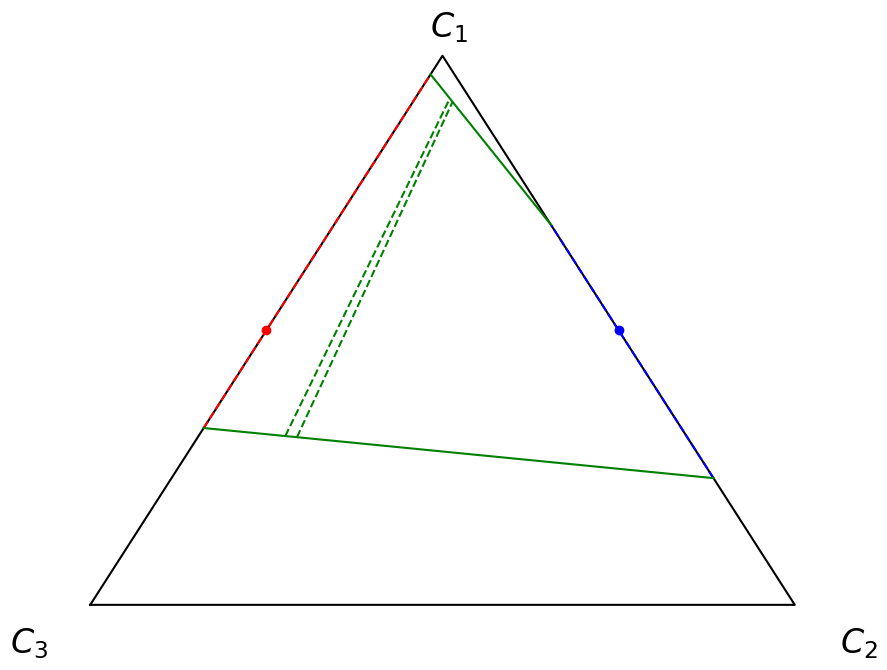

In [3]:
z = np.array([[0,0],[1,0],[0,1],[0,0]])
# transfer matrix
mt = np.transpose([[1/2,1],[np.sqrt(3)/2,0]])

##############################################################################################################
# plot triangle
p = np.matmul(z, mt)
plt.figure(figsize=(10, 8), dpi=100)
plt.plot(p[:,0],p[:,1],'k', linewidth=1.5)


# plot the corresponding composition in the ternary diagram
z1_new = np.matmul(z1[:-1], mt)
z2_new = np.matmul(z2[:-1], mt)
plt.plot(z1_new[0],z1_new[1],'ro',z2_new[0],z2_new[1],'bo')



# plot the corresponding tie-line
X1 = RR(K,z1)
X2 = RR(K,z2)

x1 = np.matmul(X1[0][:-1], mt)
y1 = np.matmul(X1[1][:-1], mt)

x2 = np.matmul(X2[0][:-1], mt)
y2 = np.matmul(X2[1][:-1], mt)

plt.plot([x1[0],y1[0]],[x1[1],y1[1]],'r--')
plt.plot([x2[0],y2[0]],[x2[1],y2[1]],'b--')
plt.plot([x1[0],x2[0]],[x1[1],x2[1]],'g')
plt.plot([y1[0],y2[0]],[y1[1],y2[1]],'g')

plt.gcf().text(0.5, 0.87, '$C_1$', fontsize=24,color='black')
plt.gcf().text(0.91, 0.1, '$C_2$', fontsize=24,color='black')
plt.gcf().text(0.08, 0.1, '$C_3$', fontsize=24,color='black')
plt.axis('off')


# what if the composition is z3 = np.array([0.5, 0.1, 0.4])
z3 = np.array([0.5, 0.1, 0.4])
X3 = RR(K,z3)
x3 = np.matmul(X3[0][:-1],mt)
y3 = np.matmul(X3[1][:-1],mt)
plt.plot([x3[0],y3[0]],[x3[1],y3[1]],'g--')

z3 = np.array([0.6, 0.1, 0.3])
X3 = RR(K,z3)
x3 = np.matmul(X3[0][:-1],mt)
y3 = np.matmul(X3[1][:-1],mt)
plt.plot([x3[0],y3[0]],[x3[1],y3[1]],'g--')


plt.show()